# Linear Regression
Reference: https://towardsdatascience.com/coding-linear-regression-from-scratch-c42ec079902

In [20]:
# Setup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

mu = []
std = []

def plot_data(x, y):
	plt.xlabel('house size')
	plt.ylabel('price')
	plt.plot(x[:,0], y, 'bo')
	plt.show()

def normalize(data):
	for i in range(0,data.shape[1]-1):
		data[:,i] = ((data[:,i] - np.mean(data[:,i]))/np.std(data[:, i]))
		mu.append(np.mean(data[:,i]))
		std.append(np.std(data[:,i]))

def load_data(filename):
    df = pd.read_csv(filename, sep=",", index_col=False)
    df.fillna(0, inplace=True)
    columns_of_interest = [
		"bathrooms",
		"bedrooms",
		"favoriteCount",
		"lastSoldPrice",
		"pageViewCount",
		"price",
	]

    extracted_data = df[columns_of_interest]
    data = np.array(extracted_data, dtype=float)
    plot_data(data[:, :2], data[:, -1])
    normalize(data)
    return data[:, :-1], data[:, -1]

In [14]:
# Linear function
def h(x, theta):
    return np.matmul(x, theta)

# Cost function
def cost_function(x, y, theta):
    return ((h(x, theta) - y).T @ (h(x, theta) - y)) / (2 * y.shape[0])


# Gradient descent
def gradient_descent(x, y, theta, learning_rate=0.1, num_epochs=10):
    m = x.shape[0]
    J_all = []

    for _ in range(num_epochs):
        h_x = h(x, theta)
        d_cost = (1 / m) * (x.T @ (h_x - y))
        theta = theta - (learning_rate) * d_cost
        J_all.append(cost_function(x, y, theta))

    return theta, J_all

In [15]:
def plot_cost(J_all, num_epochs):
    plt.xlabel("Epochs")
    plt.ylabel("Cost")
    plt.plot(num_epochs, J_all, "m", linewidth="5")
    plt.show()


def test(theta, x):
    x[0] = (x[0] - mu[0]) / std[0]
    x[1] = (x[1] - mu[1]) / std[1]

    y = theta[0] + theta[1] * x[0] + theta[2] * x[1]
    print("Price of house: ", y)

/tmp/ipykernel_11158/2706866170.py:22: DtypeWarning: Columns (20,50,161,200) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename, sep=",", index_col=False)


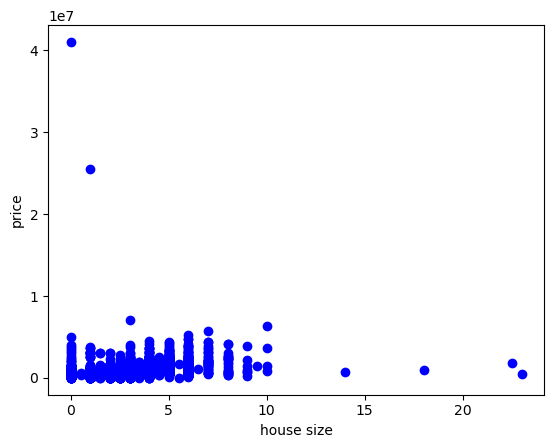

Training size: 20584, Testing size: 5147
Test cost:  [[2.93015698e+08]]
Parameters:  [[583174.33585287]
 [  5620.19338434]
 [ -2602.46595949]
 [  -595.33973444]
 [447357.50798431]
 [  6759.07053137]]


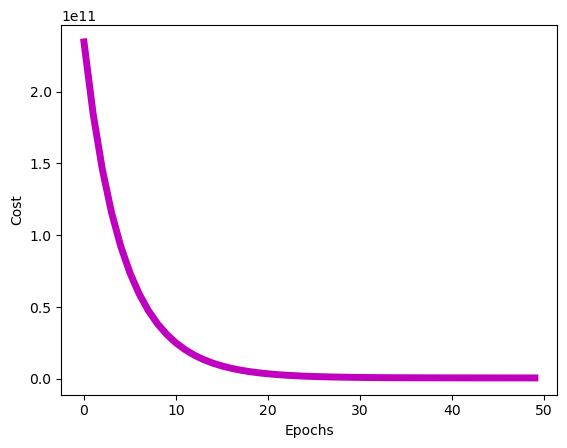

In [22]:
# Import & visualize

x, y = load_data("../../datasets/house_price/portland_housing.csv")

y = np.reshape(y, (x.shape[0], 1))
x = np.hstack((np.ones((x.shape[0], 1)), x))

train_size = int(x.shape[0] * 4/5)
test_size = x.shape[0] - train_size

print(f"Training size: {train_size}, Testing size: {test_size}")
x_train = x[:train_size, :]
x_test = x[train_size:, :]
y_train = y[:train_size, :]
y_test = y[train_size:, :]

theta = np.zeros((x.shape[1], 1))
learning_rate = 0.1
num_epochs = 50
theta, J_all = gradient_descent(x_train, y_train, theta, learning_rate, num_epochs)

# Test
J = cost_function(x_test, y_test, theta)
print("Test cost: ", J)
print("Parameters: ", theta)

# plotting cost
n_epochs = []
jplot = []
count = 0
for i in J_all:
    jplot.append(i[0][0])
    n_epochs.append(count)
    count += 1
jplot = np.array(jplot)
n_epochs = np.array(n_epochs)
plot_cost(jplot, n_epochs)

[188, 120, 148, 212, 193, 51, 147, 92, 94, 120]


/tmp/ipykernel_11158/2706866170.py:22: DtypeWarning: Columns (20,50,161,200) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename, sep=",", index_col=False)


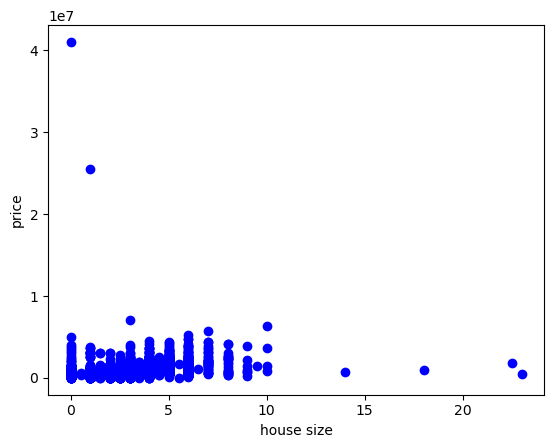

Training size: 20584, Testing size: 5147
Round 0, theta: [[242123.41311711]
 [ 52461.48908138]
 [ 35404.52911038]
 [  6212.47744   ]
 [117924.38260244]
 [  9888.67360382]]
Test cost:  [[5.36440588e+10]]
Round 1, theta: [[385401.89646379]
 [ 66362.0246599 ]
 [ 38168.66553103]
 [  7132.49984657]
 [194716.80444919]
 [ 14123.86353184]]
Test cost:  [[1.94374677e+10]]
Round 2, theta: [[469942.01416295]
 [ 66328.34953624]
 [ 31300.43222336]
 [  6548.58087583]
 [249023.79183001]
 [ 16222.16858671]]
Test cost:  [[8.36657005e+09]]
Round 3, theta: [[519665.03600457]
 [ 61567.90008025]
 [ 22866.53049433]
 [  5713.63394583]
 [289509.05922201]
 [ 17461.90520655]]
Test cost:  [[4.52868189e+09]]
Round 4, theta: [[548794.15857435]
 [ 55509.65814655]
 [ 15425.77650831]
 [  4992.49769139]
 [320653.7847192 ]
 [ 18308.70338626]]
Test cost:  [[3.01708166e+09]]
Round 5, theta: [[565767.8321817 ]
 [ 49414.54248458]
 [  9561.7813944 ]
 [  4454.7920178 ]
 [345060.74186843]
 [ 18936.73488783]]
Test cost:  [[2.29

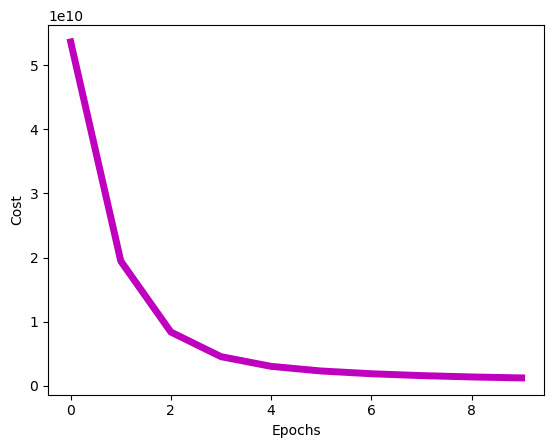

In [35]:
np.random.seed(0)
num_device = 10
per_device_size = [int(np.random.normal(100, 50)) for _ in range(num_device)]
print(per_device_size)

# Import & visualize
x, y = load_data("../../datasets/house_price/portland_housing.csv")
y = np.reshape(y, (x.shape[0], 1))
x = np.hstack((np.ones((x.shape[0], 1)), x))

train_size = int(x.shape[0] * 4 / 5)
test_size = x.shape[0] - train_size

print(f"Training size: {train_size}, Testing size: {test_size}")
x_train = x[:train_size, :]
x_test = x[train_size:, :]
y_train = y[:train_size, :]
y_test = y[train_size:, :]

# Partition
per_device_idx = [np.random.choice(train_size, size=per_device_size[i]) for i in range(num_device)]
x_data_device = [x_train[per_device_idx[i], :] for i in range(num_device)]
y_data_device = [y_train[per_device_idx[i], :] for i in range(num_device)]

theta = np.zeros((x.shape[1], 1))
learning_rate = 0.1
num_epochs = 5
num_round = 10

J_test = []

for i in range(num_round):
    theta_next = np.zeros((x.shape[1], 1))
    for j in range(num_device):
        theta_local, _ = gradient_descent(x_data_device[j], y_data_device[j], theta, learning_rate, num_epochs)
        theta_next += per_device_size[j] / sum(per_device_size) * theta_local

    theta = theta_next
    print(f"Round {i}, theta: {theta}")

    # Test
    J = cost_function(x_test, y_test, theta)
    J_test.append(J)
    print("Test cost: ", J)

# plotting cost
n_epochs = []
jplot = []
count = 0
for i in J_test:
    jplot.append(i[0][0])
    n_epochs.append(count)
    count += 1
jplot = np.array(jplot)
n_epochs = np.array(n_epochs)
plot_cost(jplot, n_epochs)